<a href="https://colab.research.google.com/github/2BARAM/jejumaster/blob/main/%EA%B3%BC%EC%A0%9C1_%EC%9D%B4%EB%AF%B8%EA%B2%BD_jeju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **과제1_이미경**#

## **우울감을 경험한 고등학생은 얼마나 될까?  (연도별 조사)** ##

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 데이터 다운로드 ##
-국가통계포털 사이트 : https://kosis.kr/index/index.do

-다운로드 : 우울감_경험률_20231104042342.csv



In [4]:
PATH = './sample_data/'
FILE = '우울감_경험률_20231104042342.csv'

In [5]:
import pandas as pd

PATH = './sample_data/'
FILE = '우울감_경험률_20231104042342.csv'

file =PATH+FILE
df =pd.read_csv(file, encoding='utf-8')
df
# df.head(100)

,응답자특성별(1),응답자특성별(2),시점,전체
0,응답자특성별(1),응답자특성별(2),시점,분석대상자수 (명)
1,학교급별,중학교,2013,36530
2,학교급별,중학교,2014,36156
3,학교급별,중학교,2015,34299
4,학교급별,중학교,2016,32219
...,...,...,...,...
186,지역별,제주,2018,1452
187,지역별,제주,2019,1283
188,지역별,제주,2020,1396
189,지역별,제주,2021,1375


In [6]:
!pip install missingno

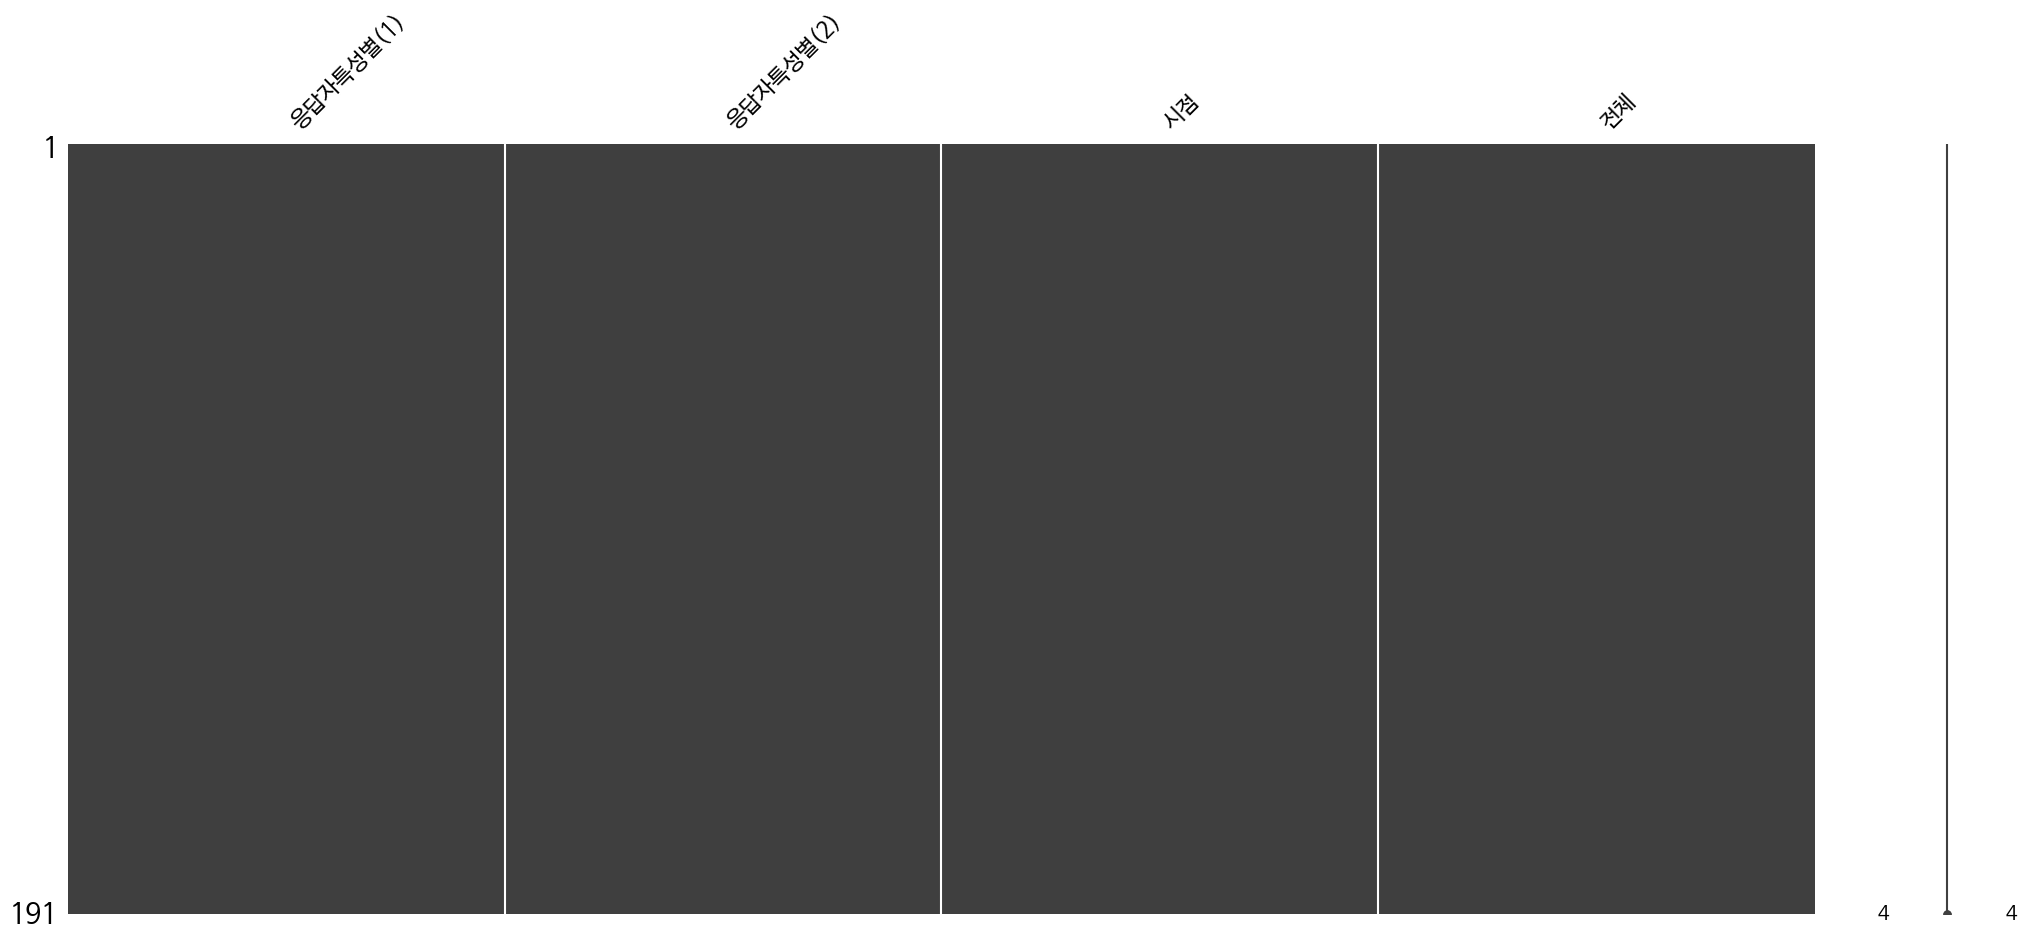

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

msno.matrix(df)
plt.show()

In [8]:
df.columns

Index(['응답자특성별(1)', '응답자특성별(2)', '시점', '전체'], dtype='object')

In [9]:
df.columns=['특성1', '대상', '년도', '경험자수']
df.columns

Index(['특성1', '대상', '년도', '경험자수'], dtype='object')

In [10]:
df

,특성1,대상,년도,경험자수
0,응답자특성별(1),응답자특성별(2),시점,분석대상자수 (명)
1,학교급별,중학교,2013,36530
2,학교급별,중학교,2014,36156
3,학교급별,중학교,2015,34299
4,학교급별,중학교,2016,32219
...,...,...,...,...
186,지역별,제주,2018,1452
187,지역별,제주,2019,1283
188,지역별,제주,2020,1396
189,지역별,제주,2021,1375


In [11]:
df.drop('특성1', axis=1, inplace=True)
df.head(2)

,대상,년도,경험자수
0,응답자특성별(2),시점,분석대상자수 (명)
1,중학교,2013,36530


In [12]:
df.drop(0, axis=0, inplace=True)
df.head(2)

,대상,년도,경험자수
1,중학교,2013,36530
2,중학교,2014,36156


In [13]:
len (set(df['년도']))

10

In [14]:
df['대상']

1      중학교
2      중학교
3      중학교
4      중학교
5      중학교
      ... 
186     제주
187     제주
188     제주
189     제주
190     제주
Name: 대상, Length: 190, dtype: object

##**1. 전국 고등학생 우울감 경험**##

In [15]:
df_student= df[df['대상'].str.contains('고등학교')]
df_student

,대상,년도,경험자수
11,고등학교,2013,35905
12,고등학교,2014,35904
13,고등학교,2015,33744
14,고등학교,2016,33309
15,고등학교,2017,31391
16,고등학교,2018,29811
17,고등학교,2019,27919
18,고등학교,2020,25987
19,고등학교,2021,24833
20,고등학교,2022,23835


In [16]:
df_student_group = df_student.groupby('년도').sum(numeric_only=False)
df_student_group

,대상,경험자수
년도,,
2013,고등학교,35905
2014,고등학교,35904
2015,고등학교,33744
2016,고등학교,33309
2017,고등학교,31391
2018,고등학교,29811
2019,고등학교,27919
2020,고등학교,25987
2021,고등학교,24833


In [17]:
df_student_group['경험자수'] = df_student_group['경험자수'].astype(int)  #형태를 변경 object->int

### **가공한 데이터 : melancholy.csv 로 저장** ###

In [18]:
# 가공된 데이터 cvs 파일로 저장하기
file = PATH+'melancholy.csv'
df.to_csv(file, encoding='cp949', mode='w', index=True)

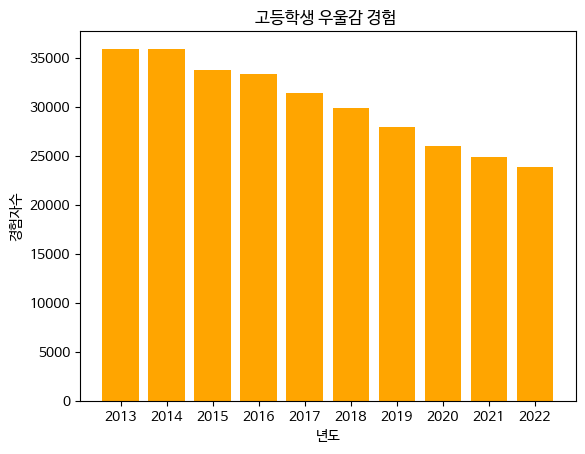

In [19]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_student_group.index
y = df_student_group['경험자수']

# 2.그래프 그리기
plt.bar(x, y, color='orange')

# 3. 그래프 꾸미기
plt.title('고등학생 우울감 경험 ')  # 그래프 제목
plt.xlabel('년도')                  # x축 이름
plt.ylabel('경험자수')              # y축 이름
#plt.xticks(rotation = 45)          # X축 레이블 회전
plt.show()                          # 그래프 출력하기

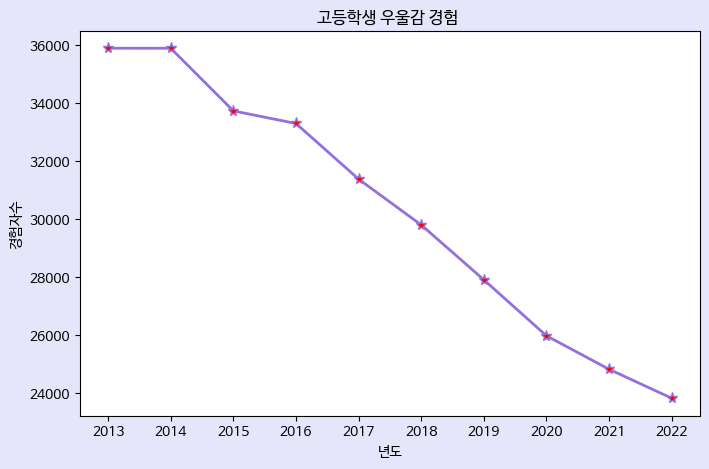

In [20]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

x = df_student_group.index
y = df_student_group['경험자수']

plt.figure(figsize = (8, 5), facecolor = 'lavender')
plt.plot(x, y, color='mediumpurple', marker='*', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')

plt.title('고등학생 우울감 경험 ')
plt.xlabel('년도')
plt.ylabel('경험자수')
plt.show()

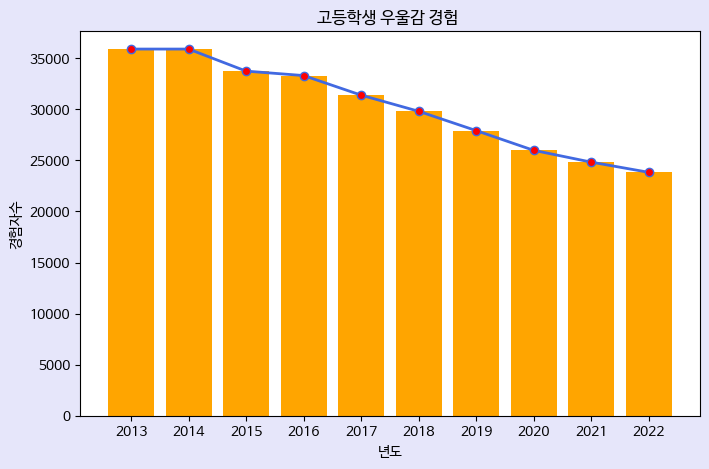

In [21]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

x = df_student_group.index
y = df_student_group['경험자수']

plt.figure(figsize = (8, 5), facecolor = 'lavender')
plt.bar(x, y, color = 'orange')
plt.plot(x, y, color='royalblue', marker='o',
         linewidth=2, markerfacecolor='red')

plt.title('고등학생 우울감 경험 ')
plt.xlabel('년도')
plt.ylabel('경험자수')

plt.show()

##**2. 제주도 고등학생 우울감 경험**##


In [22]:
df

,대상,년도,경험자수
1,중학교,2013,36530
2,중학교,2014,36156
3,중학교,2015,34299
4,중학교,2016,32219
5,중학교,2017,30885
...,...,...,...
186,제주,2018,1452
187,제주,2019,1283
188,제주,2020,1396
189,제주,2021,1375


In [23]:
df_student_jeju= df[df['대상'].str.contains('제주')]
df_student_jeju

,대상,년도,경험자수
181,제주,2013,1560
182,제주,2014,1664
183,제주,2015,1597
184,제주,2016,1478
185,제주,2017,1476
186,제주,2018,1452
187,제주,2019,1283
188,제주,2020,1396
189,제주,2021,1375
190,제주,2022,1310


In [24]:
df_student_jeju_group = df_student_jeju.groupby('년도').sum(numeric_only=False)
df_student_jeju_group

,대상,경험자수
년도,,
2013,제주,1560
2014,제주,1664
2015,제주,1597
2016,제주,1478
2017,제주,1476
2018,제주,1452
2019,제주,1283
2020,제주,1396
2021,제주,1375


In [26]:
df_student_jeju_group['제주'] = df_student_jeju_group['제주'].astype(int)  #형태를 변경 object->int

KeyError: ignored

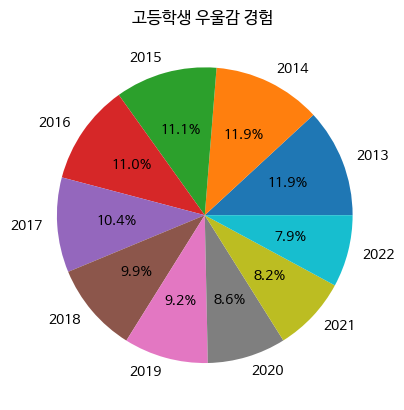

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

ratio = [35905, 35904, 33744, 33309, 31391, 29811, 27919, 25987, 24833, 23835]
labels = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

plt.pie(ratio, labels=labels, autopct='%.1f%%')

plt.title('고등학생 우울감 경험 ')

plt.show()



In [ ]:
print(''' 학년이 올라갈수록 아이들의 표정은 경직되어 있다. 그래서인지 고등학생들의 자퇴율이 예전과 다르게 높다고 한다.
여러 가지 상황과 이유가 있겠지만, 우선 아이들의 심리상태를 조사하다가 우울감의 수치가 높아 보였다.
2015년부터 10년간의 데이터로 분석을 했다.
코로나로 인해서 아이들의 우울감이 갑자기 높아졌을 것이라는 예상과 다르게 2015년 부터 꾸준하게 높아지는 수치를 보인다.
그래프로 시각화해서 보이는 모습은 더욱 명확하다. 한 번도 그래프가 낮아진 적이 없다.
 고등학생은 곧 학교를 벗어나 사회의 구성원으로 생활하기 시작한다. 그들의 행복은 대한민국 미래의 행복이다. 아이들이 더
힘들어지기 전에 작은 것부터 변화가 시작되어야 한다고 생각한다.  ''')

 학년이 올라갈수록 아이들의 표정은 경직되어 있다. 그래서인지 고등학생들의 자퇴율이 예전과 다르게 높다고 한다.
여러 가지 상황과 이유가 있겠지만, 우선 아이들의 심리상태를 조사하다가 우울감의 수치가 높아 보였다.
2015년부터 10년간의 데이터로 분석을 했다.
코로나로 인해서 아이들의 우울감이 갑자기 높아졌을 것이라는 예상과 다르게 2015년 부터 꾸준하게 높아지는 수치를 보인다.
그래프로 시각화해서 보이는 모습은 더욱 명확하다. 한 번도 그래프가 낮아진 적이 없다.
 고등학생은 곧 학교를 벗어나 사회의 구성원으로 생활하기 시작한다. 그들의 행복은 대한민국 미래의 행복이다. 아이들이 더
힘들어지기 전에 작은 것부터 변화가 시작되어야 한다고 생각한다.  
